In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from sklearn import tree
from sklearn import datasets
from sklearn import model_selection

import graphviz

# Decision trees

(example from sklearn)

In [2]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.33, random_state=3)

In [3]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, y_train)

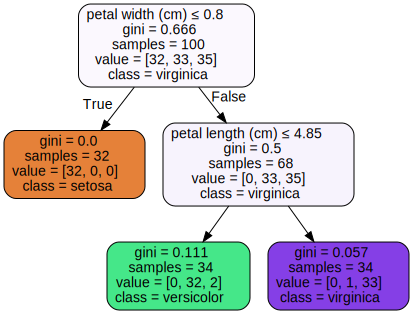

In [4]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [5]:
predictions = clf.predict(X_train)
print ('Accuracy: %d ' % ((np.sum(y_train == predictions))/float(y_train.size)*100))

Accuracy: 97 


### Increasing the depth...

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

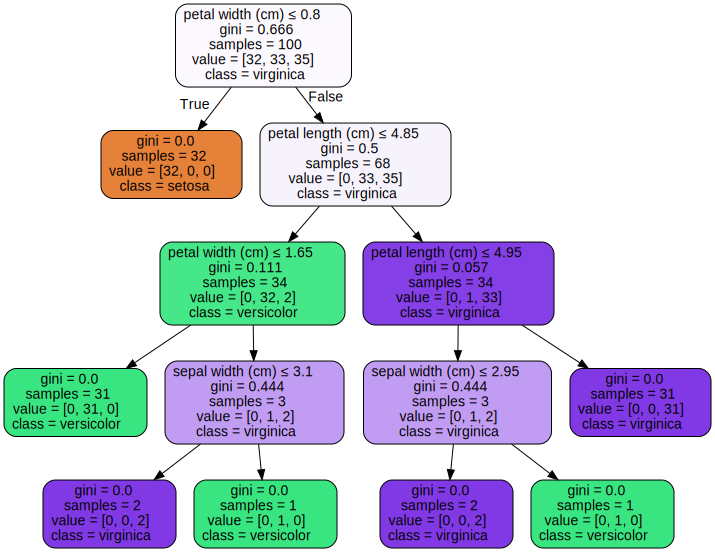

In [7]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [8]:
predictions = clf.predict(X_train)
print ('Accuracy: %d ' % ((np.sum(y_train == predictions))/float(y_train.size)*100))

Accuracy: 100 


### And what if we look at the accuracy over the test data?

In [9]:
predictions = clf.predict(X_test)
print ('Accuracy: %d ' % ((np.sum(y_test == predictions))/float(y_test.size)*100))

Accuracy: 92 


## Regression Trees

In [10]:
boston = datasets.load_boston()

X = boston.data[:, 12]  # Only using the LSTAT feature (percentage of lower status of the population)
y = boston.target

# Sort X and y by ascending values of X

sort_idx = X.flatten().argsort()
X = X[sort_idx].reshape(-1, 1)
y = y[sort_idx]

In [11]:
clf = tree.DecisionTreeRegressor(max_depth=3, criterion="mse")
clf = clf.fit(X, y)

### What do the leafs return in this case?

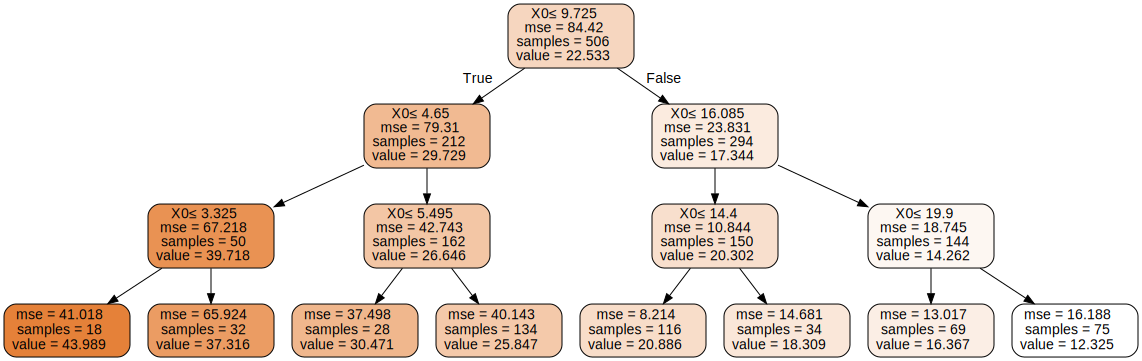

In [12]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Let's check it out

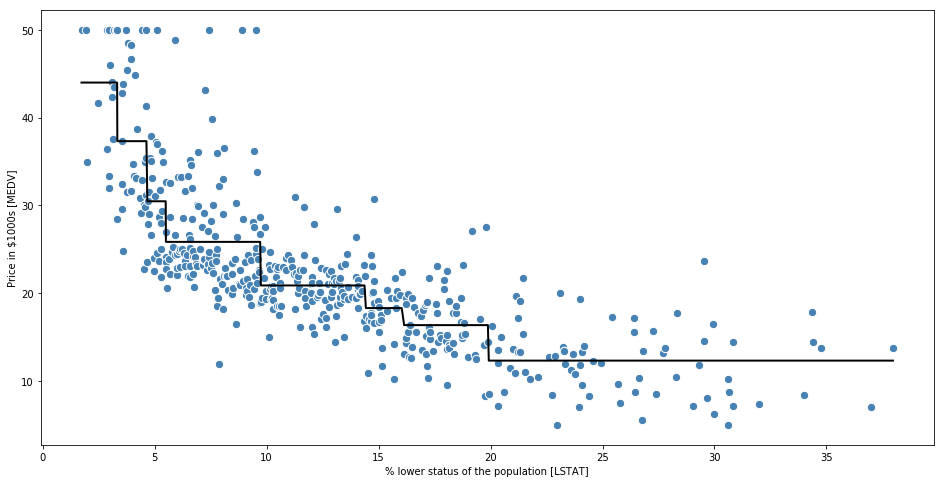

In [13]:
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='steelblue',
            edgecolor='white', s=70)
plt.plot(X, clf.predict(X),
         color='black', lw=2)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()